-As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age -13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years -old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

Note that with the simplicity of the data along with the conclusions drawn from it, a neural network may be overkill, but understand this is just to first get introduced to working with data for deep learning, and later, we'll be making use of more advanced data sets.

The block of code below shows how to generate this dummy data.



In [71]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [72]:
train_labels = []
train_samples = []

In [73]:
   for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

Data Processing
We now convert both lists into numpy arrays due to what we discussed the fit() function expects, and we then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [74]:
for i in train_samples:
    print(i)

43
68
14
84
51
78
30
92
64
82
20
74
51
97
58
93
37
81
28
67
64
72
26
94
16
65
14
70
25
81
39
80
25
79
53
70
40
69
46
92
43
89
45
70
42
77
64
91
26
94
32
68
21
88
53
73
40
98
59
89
37
91
50
93
50
75
38
92
29
74
53
69
17
86
16
99
39
93
45
73
39
74
40
90
45
85
29
87
39
92
60
66
62
98
52
96
23
83
52
82
39
82
37
77
35
81
43
65
56
67
57
93
46
89
21
86
20
81
41
91
27
69
61
95
14
86
34
99
26
89
35
87
52
75
40
76
58
89
20
77
37
96
49
80
60
95
19
94
60
72
36
77
34
96
24
73
64
84
40
77
60
73
31
89
19
69
25
93
25
74
34
98
34
88
40
81
56
94
62
66
47
71
19
66
21
93
36
78
41
71
45
87
36
72
50
80
30
92
48
79
21
83
29
66
19
100
35
79
20
75
34
86
27
77
33
87
35
90
54
94
35
99
44
87
36
100
25
90
29
79
56
89
33
85
36
92
58
89
25
74
32
67
31
79
54
92
33
95
22
80
48
74
48
100
38
75
38
67
24
68
19
98
34
97
13
85
16
79
51
92
21
67
30
73
44
67
53
73
63
84
50
65
17
65
51
67
45
72
32
68
24
92
19
86
23
83
59
72
22
90
46
83
53
96
21
94
52
89
52
93
59
82
55
71
48
93
19
85
49
91
64
90
44
89
14
97
13
66
14
90
51
91
1

In [75]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [76]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [77]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [78]:
for i in scaled_train_samples:
    print(i)

[0.28735632]
[0.36781609]
[0.98850575]
[0.79310345]
[0.94252874]
[0.11494253]
[0.73563218]
[0.63218391]
[0.82758621]
[0.82758621]
[0.88505747]
[0.62068966]
[0.17241379]
[0.93103448]
[0.64367816]
[0.95402299]
[0.52873563]
[0.13793103]
[0.33333333]
[0.68965517]
[0.2183908]
[0.68965517]
[0.70114943]
[0.94252874]
[0.34482759]
[0.44827586]
[0.65517241]
[0.8045977]
[0.27586207]
[0.85057471]
[0.62068966]
[0.98850575]
[0.66666667]
[0.04597701]
[0.98850575]
[0.65517241]
[0.98850575]
[0.93103448]
[0.91954023]
[0.28735632]
[0.59770115]
[0.04597701]
[0.37931034]
[0.96551724]
[0.43678161]
[0.43678161]
[0.95402299]
[0.17241379]
[0.93103448]
[0.26436782]
[0.09195402]
[1.]
[0.6091954]
[0.65517241]
[0.1954023]
[0.47126437]
[1.]
[0.94252874]
[0.47126437]
[0.82758621]
[0.91954023]
[0.75862069]
[0.83908046]
[0.37931034]
[0.56321839]
[0.18390805]
[0.90804598]
[0.43678161]
[0.45977011]
[0.04597701]
[0.13793103]
[0.98850575]
[0.8045977]
[0.37931034]
[0.68965517]
[0.79310345]
[0.08045977]
[0.77011494]
[0.0689

In this form, we now have the ability to pass the data to the model because it is now in the required format, however, before doing that, we'll first scale the data down to a range from 0 to 1.

We'll use scikit-learn’s MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1.

In [79]:
type(scaled_train_samples)

numpy.ndarray

In [80]:
scaled_train_samples.shape

(2100, 1)

In [81]:
train_labels.shape

(2100,)

# Create An Artificial Neural Network With TensorFlow's Keras API

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.metrics import categorical_crossentropy

In [83]:
model = Sequential([
    Dense(units=32, input_shape=(1,), activation='relu'),
    Dense(units=64, activation='relu'),
#     Dense(units=2, activation='sigmoid')
    Dense(units=4, activation='softmax')
])    

model is an instance of a Sequential object. A tf.keras.Sequential model is a linear stack of layers. It accepts a list, and each element in the list should be a layer.

As you can see, we have passed a list of layers to the Sequential constructor. Let's go through each of the layers in this list now.
Note, if you don’t explicitly set an activation function, then Keras will use the linear activation function.

First Hidden Layer Our first layer is a Dense layer. This type of layer is our standard fully-connected or densely-connected neural network layer. The first required parameter that the Dense layer expects is the number of neurons or units the layer has, and we’re arbitrarily setting this to 32.

Additionally, the model needs to know the shape of the input data. For this reason, we specify the shape of the input data in the first hidden layer in the model (and only this layer). The parameter called input_shape is how we specify this.

As discussed, we’ll be training our network on the data that we generated and processed in the previous episode, and recall, this data is one-dimensional. The input_shape parameter expects a tuple of integers that matches the shape of the input data, so we correspondingly specify (1,) as the input_shape of our one-dimensional data.

You can think of the way we specify the input_shape here as acting as an implicit input layer. The input layer of a neural network is the underlying raw data itself, therefore we don't create an explicit input layer. This first Dense layer that we're working with now is actually the first hidden layer.

Lastly, an optional parameter that we’ll set for the Dense layer is the activation function to use after this layer. We’ll use the popular choice of relu.

2nd hidden layer also the same as the above menioned Output Layer Lastly, we specify the output layer. This layer is also a Dense layer, and it will have 2 neurons. This is because we have two possible outputs: either a patient experienced side effects, or the patient did not experience side effects.

This time, the activation function we’ll use is softmax, which will give us a probability distribution among the possible outputs.

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                64        
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This function configures the model for training and expects a number of parameters. First, we specify the optimizer Adam. Adam accepts an optional parameter learning_rate, which we’ll set to 0.0001.

The next parameter we specify is loss. We’ll be using sparse_categorical_crossentropy, given that our labels are in integer format.

Note that when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use binary_crossentropy as our loss, rather than categorical_crossentropy. Both options work equally well and achieve the exact same result.

With binary_crossentropy, however, the last layer would need to use sigmoid, rather than softmax, as its activation function.

Moving on, the last parameter we specify in compile() is metrics. This parameter expects a list of metrics that we’d like to be evaluated by the model during training and testing. We’ll set this to a list that contains the string ‘accuracy’.

In [86]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10,validation_split=0.1, epochs=40, shuffle=True, verbose=2)

Epoch 1/40
189/189 - 1s - loss: 1.3091 - accuracy: 0.5153 - val_loss: 1.2430 - val_accuracy: 0.5286 - 865ms/epoch - 5ms/step
Epoch 2/40
189/189 - 0s - loss: 1.1757 - accuracy: 0.5593 - val_loss: 1.0940 - val_accuracy: 0.6095 - 240ms/epoch - 1ms/step
Epoch 3/40
189/189 - 0s - loss: 1.0085 - accuracy: 0.6106 - val_loss: 0.9149 - val_accuracy: 0.6286 - 222ms/epoch - 1ms/step
Epoch 4/40
189/189 - 0s - loss: 0.8513 - accuracy: 0.6291 - val_loss: 0.7816 - val_accuracy: 0.6905 - 227ms/epoch - 1ms/step
Epoch 5/40
189/189 - 0s - loss: 0.7409 - accuracy: 0.6857 - val_loss: 0.6895 - val_accuracy: 0.7429 - 229ms/epoch - 1ms/step
Epoch 6/40
189/189 - 0s - loss: 0.6634 - accuracy: 0.7439 - val_loss: 0.6220 - val_accuracy: 0.7857 - 229ms/epoch - 1ms/step
Epoch 7/40
189/189 - 0s - loss: 0.6048 - accuracy: 0.7725 - val_loss: 0.5682 - val_accuracy: 0.8381 - 228ms/epoch - 1ms/step
Epoch 8/40
189/189 - 0s - loss: 0.5564 - accuracy: 0.8111 - val_loss: 0.5221 - val_accuracy: 0.8667 - 227ms/epoch - 1ms/step


we specify verbose=2. This just specifies how much output to the console we want to see during each epoch of training. The verbosity levels range from 0 to 2, so we’re getting the most verbose output.

When we call fit() on the model, the model trains, and we get this output.

What Is A Validation Set?

Recall that we previously built a training set on which we trained our model. With each epoch that our model is trained, the model will continue to learn the features and characteristics of the data in this training set.

The hope is that later we can take this model, apply it to new data, and have the model accurately predict on data that it hasn’t seen before based solely on what it learned from the training set.

Now, let’s discuss where the addition of a validation set comes into play.

Before training begins, we can choose to remove a portion of the training set and place it in a validation set. Then, during training, the model will train only on the training set, and it will validate by evaluating the data in the validation set.

Essentially, the model is learning the features of the data in the training set, taking what it's learned from this data, and then predicting on the validation set. During each epoch, we will see not only the loss and accuracy results for the training set, but also for the validation set.

This allows us to see how well the model is generalizing on data it wasn’t trained on because, recall, the validation data should not be part of the training data.

This also helps us see whether or not the model is overfitting. Overfitting occurs when the model only learns the specifics of the training data and is unable to generalize well on data that it wasn’t trained on.

# Neural Network Predictions With TensorFlow's Keras API

We’ll create a test set in the same fashion for which we created the training set. In general, the test set should always be processed in the same way as the training set.

We won’t go step-by-step over the code that generates and processes the test data below, as it has already been covered in detail where we generated the training data,

In [87]:
test_labels =  []
test_samples = []

In [88]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [89]:
test_labales =np.array(test_labels)
test_samples =np.array(test_samples)
test_labales,test_samples=shuffle(test_labales, test_samples)

In [90]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predictions

In [91]:
predictions = model.predict(x=scaled_test_samples, batch_size=10,verbose=0)

To this function, we pass in the test samples x, specify a batch_size, and specify which level of verbosity we want from log messages during prediction generation. The output from the predictions won't be relevant for us, so we're setting verbose=0 for no output.

Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.

To see what the model's predictions look like, we can iterate over them and print them out.

In [92]:
# type(predictions)

In [93]:
for i in predictions:
    print(i)

[1.4394041e-02 9.8559606e-01 6.4012202e-06 3.5787523e-06]
[3.61488238e-02 9.63819087e-01 2.02220399e-05 1.18310345e-05]
[8.1751412e-01 1.8175197e-01 4.2973872e-04 3.0412362e-04]
[1.9011918e-02 9.8097390e-01 9.0573485e-06 5.1332040e-06]
[2.8706163e-01 7.1262336e-01 1.9125739e-04 1.2376363e-04]
[7.1778339e-01 2.8154129e-01 3.9895339e-04 2.7645344e-04]
[3.3002708e-02 9.6696877e-01 1.8043271e-05 1.0508480e-05]
[2.5073530e-02 9.7490633e-01 1.2796343e-05 7.3517704e-06]
[3.4842709e-01 6.5119952e-01 2.2575908e-04 1.4763624e-04]
[4.1526014e-01 5.8430529e-01 2.6166384e-04 1.7292773e-04]
[9.3143243e-01 6.7796469e-02 4.4328114e-04 3.2789871e-04]
[3.0121867e-02 9.6985269e-01 1.6094682e-05 9.3311228e-06]
[3.3002708e-02 9.6696877e-01 1.8043271e-05 1.0508480e-05]
[5.5600584e-01 4.4343916e-01 3.3134688e-04 2.2364016e-04]
[8.8482738e-02 9.1141748e-01 6.1843442e-05 3.7878915e-05]
[9.3143243e-01 6.7796469e-02 4.4328114e-04 3.2789871e-04]
[6.7665614e-02 9.3226302e-01 4.4448192e-05 2.6844895e-05]
[1.1685099

In [94]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [95]:
for i in rounded_predictions:
    print(i)

1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
0
1
0
0
1
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
1
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
1
0
1
1
0
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
0
1
0
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1
0
0
1
0
1
1
1
0
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
1
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
1
1
0
1
1
1
1
1
0
0
0
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
1
0
1
0
1
0
0


# Confusion matrix


In [112]:
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

In [113]:
cm =confusion_matrix(y_true=test_labales, y_pred=rounded_predictions)

In [114]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[192  18]
 [ 10 200]]


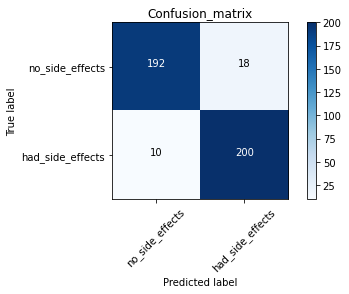

In [99]:
cm_plot_labels=['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion_matrix');

Looking at the plot of the confusion matrix, we have the predicted labels on the x-axis and the true labels on the y-axis. The blue cells running from the top left to bottom right contain the number of samples that the model accurately predicted. The white cells contain the number of samples that were incorrectly predicted.

There are 420 total samples in the test set. Looking at the confusion matrix, we can see that the model accurately predicted 393 out of 420 total samples. The model incorrectly predicted 25 out of the 420.

For the samples the model got correct, we can see that it accurately predicted that the patients would experience no side effects 195 times. It incorrectly predicted that the patient would have no side effects 10 times when the patient did actually experience side effects.

On the other side, the model accurately predicted that the patient would experience side effects 200 times that the patient did indeed experience side effects. It incorrectly predicted that the patient would have side effects 15 times when the patient actually did not experience side effects.

As you can see, this is a good way we can visually interpret how well the model is doing at its predictions and understand where it may need some work.

# Saving And Loading The Model In Its Entirety

If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the save() function on the model. To save(), we pass in the file path and name of the file we want to save the model to with an h5 extension.

In [100]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [101]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [102]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [103]:
new_model.get_weights()

[array([[ 0.4828081 , -0.2153831 ,  0.39323348, -0.40155962,  0.33899322,
         -0.00459412, -0.39761552, -0.41425872,  0.49946716, -0.24381664,
         -0.32185537, -0.09399194,  0.2104925 ,  0.43354702,  0.17544018,
          0.55446345,  0.05158114,  0.08219424,  0.501576  , -0.02580374,
          0.60211855, -0.39940265,  0.35366538,  0.14965974, -0.3571025 ,
         -0.0933471 , -0.10840762, -0.11408472, -0.1541476 ,  0.07303179,
          0.3335158 , -0.17585313]], dtype=float32),
 array([ 0.07130095,  0.        , -0.13263455,  0.        , -0.10362294,
         0.        ,  0.        ,  0.        , -0.09652738,  0.        ,
         0.        ,  0.        ,  0.25891334, -0.02891378,  0.26246452,
        -0.03892282,  0.24381222,  0.2817469 ,  0.18321349,  0.        ,
         0.01183612,  0.        , -0.11955205,  0.27980238,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.25969186,
         0.01364038,  0.        ], dtype=float32),
 array([[-0.20

In [111]:
new_model.optimizer

# 2model.to_json()

In [106]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_15_input"}}, {"class_name": "Dense", "config": {"name": "dense_15", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_16", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null

In [107]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

By printing the summary of the model, we can verify that the new model has the same architecture of the model that was previously saved.

In [108]:
model_architecture.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                64        
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


Note, we can also use this same approach to saving and loading the model architecture to and from a YAML string. To do so, we use the functions to_yaml() and model_from_yaml() in the same fashion as we called the json functions.

- Saving And Loading The Weights Of The Model
The last saving mechanism we’ll discuss only saves the weights of the model.

We can do this by calling model.save_weights() and passing in the path and file name to save the weights to with an h5 extension.

In [109]:
model.save_weights('my_model_weights.h5')

In [110]:
model2 = Sequential([
    Dense(units=32, input_shape=(1,), activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=4, activation='softmax')
])
model2.load_weights('my_model_weights.h5')

We’ve now seen how to save only the weights of a model and deploy those weights to a new model, how to save only the architecture and then deploy that architecture to a model, and how to save everything about a model and deploy it in its entirety at a later time. Each of these saving and loading mechanisms may come in useful in differing scenarios.